## Adult dataset 

Questo è un buon esempio di quello che vorrei ottenere, ma non è molto utile come risultato.

In [58]:
%run -i 'functions.py'
%run -i 'encode_csv.py'

In [16]:
adult_train = pd.read_csv(
    "../datasets/adult.data.txt",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

print(len(adult_train))
adult_train = adult_train.dropna()
print(len(adult_train))

adult_train.head()

32561
30162


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
adult_test = pd.read_csv(
    "../datasets/adult.test.txt",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

print(len(adult_test))
adult_test = adult_test.dropna()
print(len(adult_test))

adult_test.head()

16282
15060


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.


In [18]:
adult_train_encoded, encoders = number_encode_features(adult_train)
adult_train_encoded.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [19]:
adult_test_encoded, encoders = number_encode_features(adult_test)
adult_test_encoded.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
1,8,2,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37,0
2,21,2,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37,0
3,11,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37,1
4,27,2,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37,1
6,17,2,198693.0,0,6.0,4,7,1,4,1,0.0,0.0,30.0,37,0


In [20]:
y_train = adult_train_encoded["Target"].values
# y_train = y_train.values

# scale between -1 and 1
X_train = adult_train_encoded.iloc[:,:-1]
X_train = scale_columns(X_train)

X_train.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,0.007700,0.466779,-0.076331,-0.088918,0.191913,0.236644,-0.458450,-0.083668,0.080349,0.324315,0.01082,-0.020288,-0.009502,0.040436
1,0.158385,0.300113,-0.072391,-0.088918,0.191913,-0.096689,-0.227681,-0.283668,0.080349,0.324315,-0.01092,-0.020288,-0.285013,0.040436
2,-0.005999,-0.033221,0.017575,0.044416,-0.074754,-0.430022,-0.073835,-0.083668,0.080349,0.324315,-0.01092,-0.020288,-0.009502,0.040436
3,0.199481,-0.033221,0.030543,-0.622251,-0.208087,-0.096689,-0.073835,-0.283668,-0.419651,0.324315,-0.01092,-0.020288,-0.009502,0.040436
4,-0.142985,-0.033221,0.101034,-0.088918,0.191913,-0.096689,0.233858,0.716332,-0.419651,-0.675685,-0.01092,-0.020288,-0.009502,-0.809564


In [21]:
y_test = adult_test_encoded["Target"].values

# scale between -1 and 1
X_test = adult_test_encoded.iloc[:,:-1]
X_test = scale_columns(X_test)

X_test.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
1,-0.191213,-0.035812,0.025178,-0.618158,-0.207517,0.234119,0.000843,0.319721,-0.420916,0.326228,-0.011203,-0.023619,-0.009710,0.039292
2,-0.010657,-0.035812,-0.067575,0.048508,-0.074183,-0.099214,-0.153003,-0.280279,0.079084,0.326228,-0.011203,-0.023619,0.092331,0.039292
3,-0.149546,-0.202479,0.099759,-0.218158,0.125817,-0.099214,0.308535,-0.280279,0.079084,0.326228,-0.011203,-0.023619,-0.009710,0.039292
4,0.072676,-0.035812,-0.019834,0.315175,-0.007517,-0.099214,0.000843,-0.280279,-0.420916,0.326228,0.065678,-0.023619,-0.009710,0.039292
6,-0.066213,-0.035812,0.006146,-0.684825,-0.274183,0.234119,0.077766,-0.080279,0.079084,0.326228,-0.011203,-0.023619,-0.111751,0.039292


In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)
print(len(X_train), "training,", len(X_test), "test")

30162 training, 15060 test


In [56]:
adult_fit = fit_all(X_train, y_train, X_test, y_test, scale_samples=10)
save(adult_fit, 'adult')


kernel svm fitting

linear svm fitting

nystroem svm fitting

 10 / 80 samples

 20 / 80 samples

 30 / 80 samples

 40 / 80 samples

 50 / 80 samples

 60 / 80 samples

 70 / 80 samples

 80 / 80 samples

fourier svm fitting

 10 / 80 samples

 20 / 80 samples

 30 / 80 samples

 40 / 80 samples

 50 / 80 samples

 60 / 80 samples

 70 / 80 samples

 80 / 80 samples


In [ ]:
# adult_fit

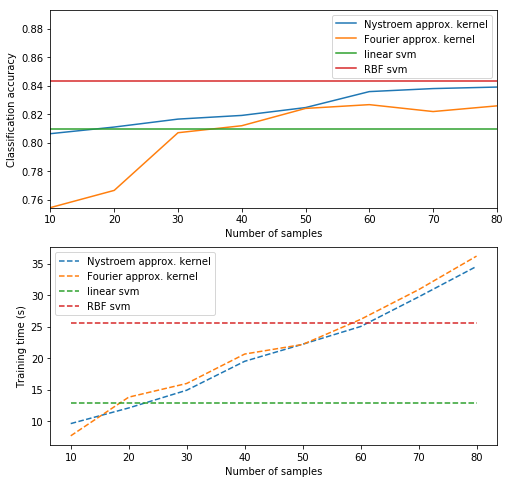

In [59]:
plot_results(adult_fit)

### Conclusioni

Qui ho 30162 training e 15060 test. Con meno di 60 random samples ho un'accuratezza abbastanza buona e tempi di esecuzione più bassi rispetto a RBF, ma comunque si tratta di pochi secondi... niente di utile quindi.

Devo ritestarlo con GPU.